<a href="https://colab.research.google.com/github/Chzam/Computer-Vision/blob/main/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zamer CHAUDHARY

1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

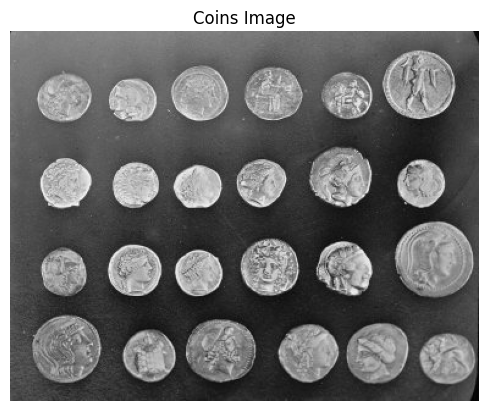

Image shape: (303, 384)
Min pixel grayscale level: 1
Max pixel grayscale level: 252


In [85]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import data
import numpy as np

# Load 'coins' image
I = data.coins()

# Visualize image
plt.imshow(I, cmap='gray')
plt.title('Coins Image')
plt.axis('off')
plt.show()

# Report image size and grayscale range
print('Image shape:', I.shape)
print('Min pixel grayscale level:', np.min(I))
print('Max pixel grayscale level:', np.max(I))


2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

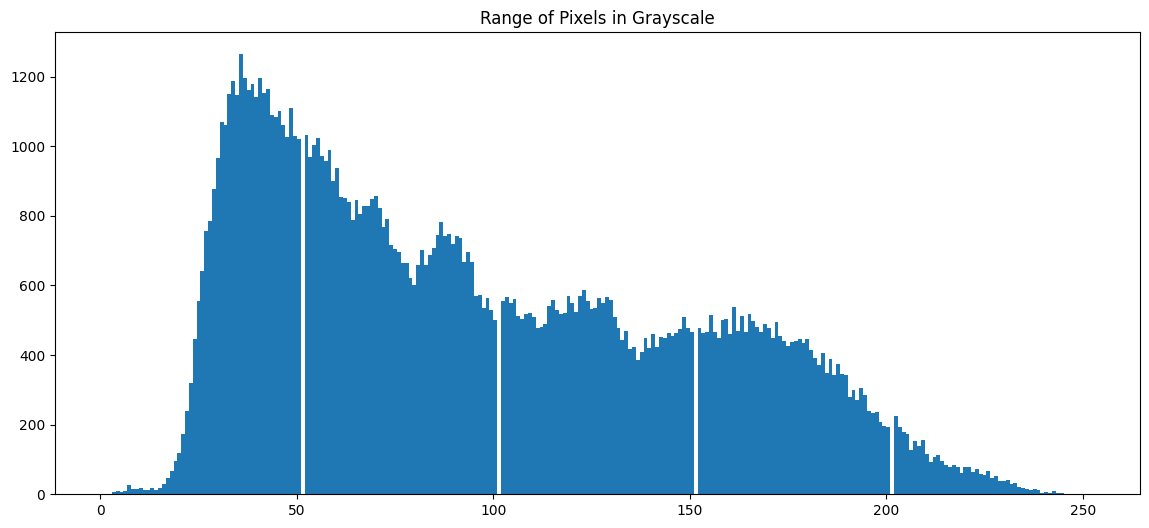

In [20]:
from skimage.util import img_as_ubyte

# Convert image to uint8 format
IGB = img_as_ubyte(I)

# Reshape the uint8 image as a 1D array
v = IGB.reshape(IGB.shape[0] * IGB.shape[1], 1)

# Plot histogram
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256, density=False)
plt.title('Range of Pixels in Grayscale')
plt.show()


Peak around lower intensities (left side of the histogram): This corresponds to the darker regions of the image, which are typically the background (e.g., the area behind the coins).

Peak around higher intensities (right side of the histogram): This indicates the brighter regions of the image, which likely represent the coins themselves due to their reflective surfaces, creating higher pixel intensity values.

This histogram shows the distribution of pixel intensities across the image, helping us visualize how the background and coins are represented in terms of grayscale levels.

3. Applied noise to the image and use the correct function to erase the noise.


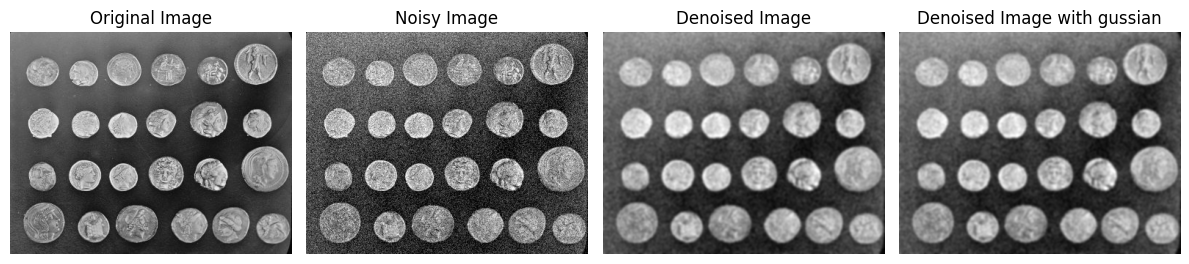

In [36]:
from skimage.util import random_noise
from skimage.filters import median
from skimage.morphology import disk
from skimage.filters import gaussian

# Add noise to the image (e.g., Gaussian noise)
I_noisy = random_noise(I, mode='gaussian', var=0.01)

# Denoise the image using median filter
I_denoised = median(I_noisy, disk(3))  # Disk-shaped neighborhood of radius 3

# Apply Gaussian filter to denoise
I_denoised = gaussian(I_noisy, sigma=1.5)

# Display the original, noisy, and denoised images
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(I_noisy, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(I_denoised, cmap='gray')
axes[2].set_title('Denoised Image')
axes[2].axis('off')

axes[3].imshow(I_denoised, cmap='gray')
axes[3].set_title('Denoised Image with gussian')
axes[3].axis('off')

plt.tight_layout()
plt.show()


I tried using two different filters to denoise the image. First, I applied a median filter, but the results were not very satisfying, even after adjusting the filter size. Then, I applied a Gaussian filter and experimented with different sigma values. However, the results from both filters appeared quite similar and did not significantly improve the image quality.

4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

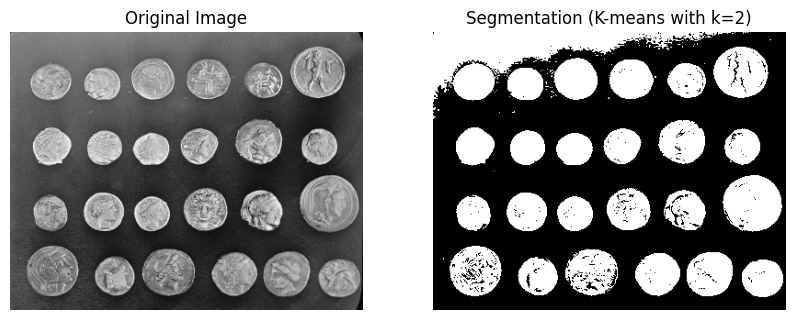

In [70]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# Reshape the image into a 2D array (flattening)
v_I = I.reshape(-1, 1)

# Fit a KMeans clustering model with k=2 clusters
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict the clusters
v_kmeans = kmeans.predict(v_I)

# Reshape back to original image size
I_kmeans = np.reshape(v_kmeans, (I.shape[0], I.shape[1]))

# Visualize the original and segmented images using gridspec
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()


5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?


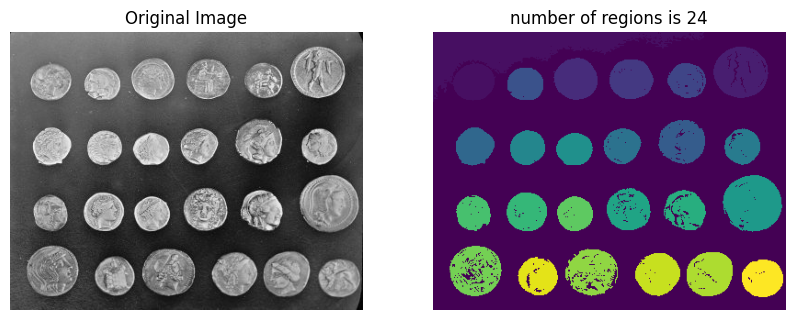

In [90]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage import morphology

thresh = threshold_otsu(I)
bw = I > thresh

cleaned = morphology.remove_small_objects(bw, min_size=100)

label_image, nregions = label(cleaned,return_num=True)

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(label_image)
ax2.set_title('number of regions is {}'.format(nregions))
ax2.set_axis_off()

plt.show()

6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

Average Area: 1866.625
Average Major Axis Length: 56.952990768829274
Average Orientation: -0.0032797474188605014


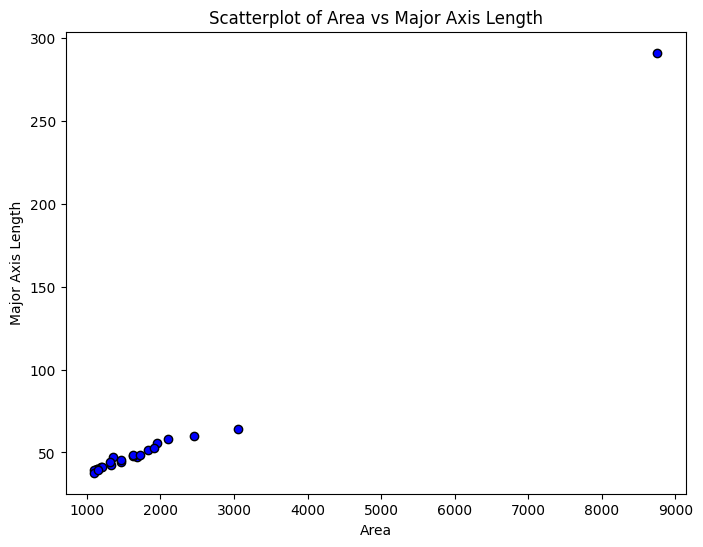

In [91]:
from skimage import data, measure
from skimage import morphology

# Clean small objects (noise removal)
cleaned = morphology.remove_small_objects(bw, min_size=100)

# Label the connected regions (coins)
labeled_image, nregions = measure.label(cleaned, return_num=True)

# Extract region properties using regionprops_table
regions_props = measure.regionprops_table(labeled_image, properties=['area', 'major_axis_length', 'orientation'])

# Convert to a numpy array for easier manipulation
areas = regions_props['area']
major_axis_lengths = regions_props['major_axis_length']
orientations = regions_props['orientation']

# Calculate the average values of the extracted features
average_area = np.mean(areas)
average_major_axis_length = np.mean(major_axis_lengths)
average_orientation = np.mean(orientations)

# Print the average values
print(f'Average Area: {average_area}')
print(f'Average Major Axis Length: {average_major_axis_length}')
print(f'Average Orientation: {average_orientation}')

# Scatter plot of Area vs Major Axis Length
plt.figure(figsize=(8, 6))
plt.scatter(areas, major_axis_lengths, c='blue', edgecolors='black')
plt.title('Scatterplot of Area vs Major Axis Length')
plt.xlabel('Area')
plt.ylabel('Major Axis Length')
plt.show()



7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?


In [92]:
from skimage.measure import regionprops_table
import pandas as pd

# Create a DataFrame
df_features = pd.DataFrame(regions_props)

# Filter the coins with area greater than 1750 pixels
df_coins = df_features.loc[df_features['area'] > 1750]

# Show the first few rows of the filtered DataFrame
print(df_coins.head())

# Print the number of identified coins with area > 1750
print(f'Number of coins with area greater than 1750 pixels: {df_coins.shape[0]}')


      area  major_axis_length  orientation
0   8755.0         291.294551    -1.423307
1   2459.0          59.966495     1.552547
6   1834.0          51.413541     1.532118
12  3054.0          64.238604     1.321690
18  2099.0          58.230243    -1.108783
Number of coins with area greater than 1750 pixels: 7


8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

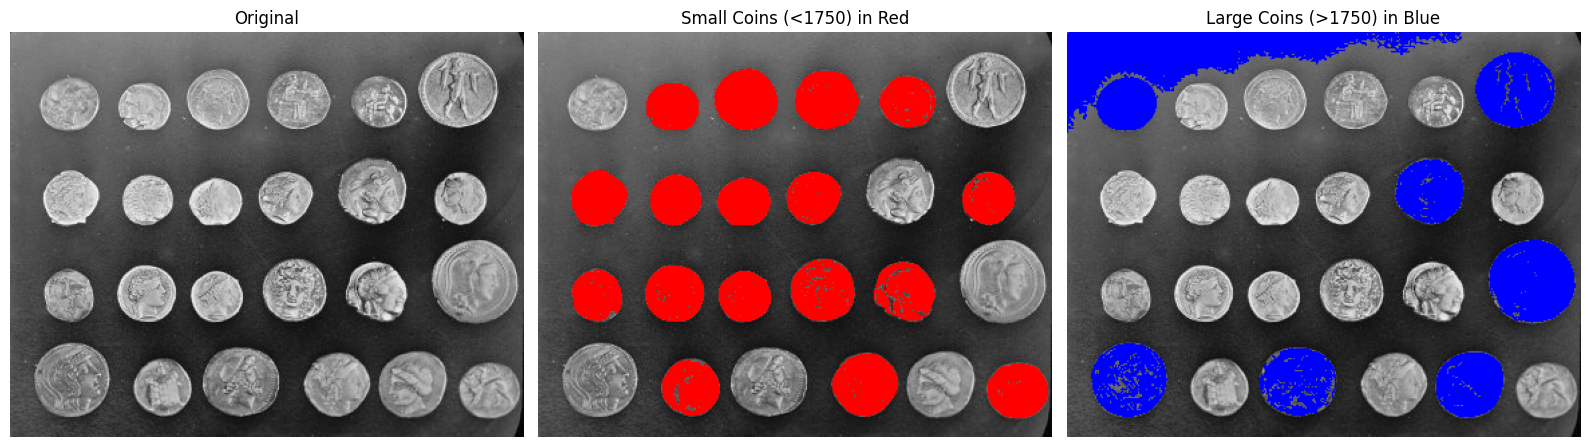

In [93]:
from skimage import color
import numpy as np
import matplotlib.pyplot as plt

# Get the region labels from the labeled_image
small = df_features.loc[df_features['area'] < 1750].index + 1  # +1 to match the region labels
big = df_features.loc[df_features['area'] > 1750].index + 1  # +1 to match the region labels

# Create masks for small and large coins based on region labels
small_mask = np.isin(labeled_image, small)
big_mask = np.isin(labeled_image, big)

# Create RGB overlays for visualization
overlay_small = color.gray2rgb(I.copy())  # Convert to RGB
overlay_big = color.gray2rgb(I.copy())  # Convert to RGB

# Apply red color to small coins and blue color to large coins
overlay_small[small_mask] = [255, 0, 0]  # Red color for small coins
overlay_big[big_mask] = [0, 0, 255]  # Blue color for large coins

# Display the 3-panel figure
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# Original Image
axs[0].imshow(I, cmap='gray')
axs[0].set_title("Original")
axs[0].axis("off")

# Small coins in red
axs[1].imshow(overlay_small)
axs[1].set_title("Small Coins (<1750) in Red")
axs[1].axis("off")

# Large coins in blue
axs[2].imshow(overlay_big)
axs[2].set_title("Large Coins (>1750) in Blue")
axs[2].axis("off")

plt.tight_layout()
plt.show()


9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

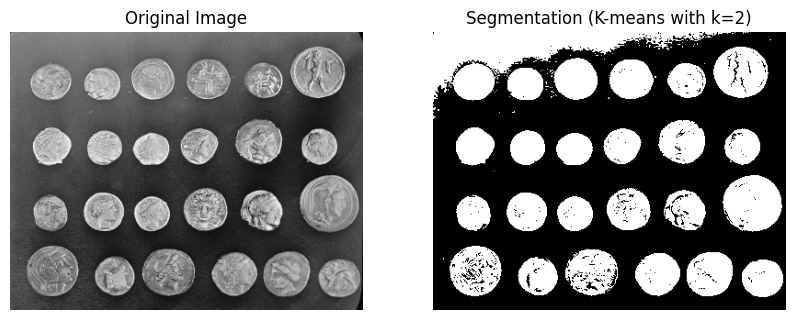

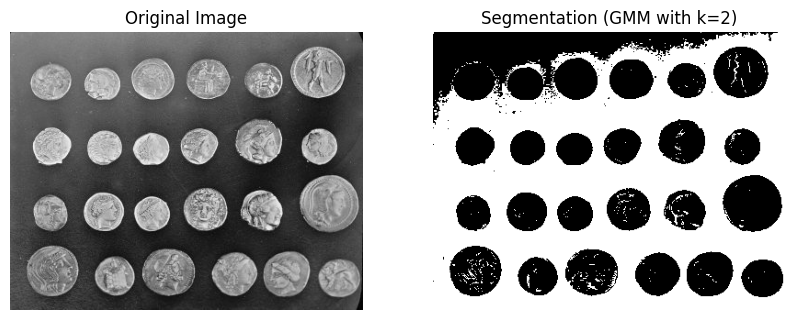

In [94]:
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn import mixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reshape the image into a 2D array (flattening)
v_I = I.reshape(-1, 1)

# Fit a KMeans clustering model with k=2 clusters
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict the clusters for KMeans
v_kmeans = kmeans.predict(v_I)

# Reshape back to original image size for KMeans
I_kmeans = np.reshape(v_kmeans, (I.shape[0], I.shape[1]))

# Fit the GMM model (using the same number of clusters, n_clus)
gmm = mixture.GaussianMixture(n_components=n_clus)
v_gmm = gmm.fit_predict(v_I)

# Reshape the GMM results back to original image size
I_gmm = np.reshape(v_gmm, (I.shape[0], I.shape[1]))

# Create a figure for visualization
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

# Plot the K-Means result
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

# Plot the K-Means Segmentation result
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

# Display the results
plt.show()

# Create another figure for GMM Segmentation
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

# Plot the Original Image again
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

# Plot the GMM Segmentation result
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_gmm, cmap=plt.cm.gray)
ax2.set_title('Segmentation (GMM with k={})'.format(n_clus))
ax2.set_axis_off()

# Display the results
plt.show()


10. Extract the main texture features of this image

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

props = regionprops(label_image, intensity_image=I)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    IG = I[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calcular GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extraer características
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

columns = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
df_texture = pd.DataFrame(props_texture, columns=columns)
print(df_texture.head())
print("\nAverage values per feature:")
print(df_texture.mean())

     contrast  dissimilarity  homogeneity    energy  correlation
0  351.845453       9.292566     0.238239  0.019559     0.937166
1  351.845453       9.292566     0.238239  0.019559     0.937166
2  351.845453       9.292566     0.238239  0.019559     0.937166
3  351.845453       9.292566     0.238239  0.019559     0.937166
4  351.845453       9.292566     0.238239  0.019559     0.937166

Average values per feature:
contrast         351.845453
dissimilarity      9.292566
homogeneity        0.238239
energy             0.019559
correlation        0.937166
dtype: float64


This Computer Vision course has been a fantastic journey. I’ve learned how computers interpret and analyze images, which is much more intricate than I initially realized. From basic image manipulation to more advanced techniques like segmentation, feature extraction, and texture analysis (such as using GLCM), the course really deepened my understanding of visual data processing.

The practical assignments helped me apply what I learned, like using K-Means and GMM for image clustering and segmentation, which gave me hands-on experience with real-world applications such as object detection and pattern recognition.

The professor was excellent breaking down complex ideas and making them accessible. They also encouraged us to connect theory with real-world problems, which made the material much more engaging and relevant. I also appreciated how supportive they were, always willing to answer questions and provide feedback that pushed me to improve.

Overall, this course has given me both a solid foundation and the confidence to dive deeper into computer vision. It’s an exciting field, and I’m looking forward to exploring more in the future!